# <span style="color:red"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Exercise 6 </span>
### <span style="color:blue"> Exercise 6.1 </span>

In this exercise we were asked to complete an already existing code, which simulated a 1D Ising Model. The code was theoretically able to measure the internal energy, but for it to do that we needed to implement a sampling algorithm. We added the Metropolis algorithm and the Gibbs one. 

In the following simulations we note that thermalization is so rapid (converges in a number of steps of order $\sim 10$ both for T=2.0 and T=0.5) that we don't need to discard values at the start of the simulation.

### Metropolis vs Gibbs

Both the Metropolis and the Gibbs algorithm present a compatible trend.

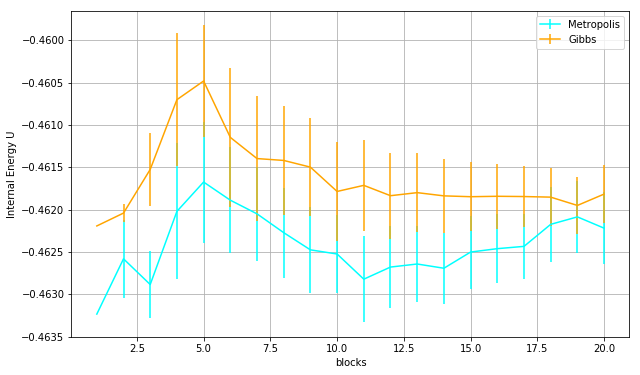

In [66]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,6))
x, f, error = np.loadtxt("ISING_1D/output.ene.10", usecols=(0,2,3), delimiter=' ', unpack='true')
xG, fG, errorG = np.loadtxt("ISING_1D/outputG.ene.10", usecols=(0,2,3), delimiter=' ', unpack='true')
plt.errorbar(x,f,yerr=error, color="cyan", label= "Metropolis")
plt.errorbar(xG,fG,yerr=errorG, color="orange", label= "Gibbs")
plt.xlabel('blocks')
plt.ylabel('Internal Energy U')
plt.grid(True)
plt.legend()
plt.show()

In [63]:
with open('EnergyM.txt', 'w') as file:
    for i in range(11):
        with open("ISING_1D/output.ene." + str(i), 'r') as f:
            lines = f.read().splitlines()
            last_line = lines[-1]
            file.write(str(0.5+i*0.15)+" "+last_line + "\n")
            
with open('EnergyG.txt', 'w') as file:
    for i in range(11):
        with open("ISING_1D/outputG.ene." + str(i), 'r') as f:
            lines = f.read().splitlines()
            last_line = lines[-1]
            file.write(str(0.5+i*0.15)+" "+last_line + "\n")

with open('HeatM.txt', 'w') as file:
    for i in range(11):
        with open("ISING_1D/output.heat." + str(i), 'r') as f:
            lines = f.read().splitlines()
            last_line = lines[-1]
            file.write(str(0.5+i*0.15)+" "+last_line + "\n")
            
with open('HeatG.txt', 'w') as file:
    for i in range(11):
        with open("ISING_1D/outputG.heat." + str(i), 'r') as f:
            lines = f.read().splitlines()
            last_line = lines[-1]
            file.write(str(0.5+i*0.15)+" "+last_line + "\n")

with open('MagM.txt', 'w') as file:
    for i in range(11):
        with open("ISING_1D/output.mag." + str(i), 'r') as f:
            lines = f.read().splitlines()
            last_line = lines[-1]
            file.write(str(0.5+i*0.15)+" "+last_line + "\n")
            
with open('MagG.txt', 'w') as file:
    for i in range(11):
        with open("ISING_1D/outputG.mag." + str(i), 'r') as f:
            lines = f.read().splitlines()
            last_line = lines[-1]
            file.write(str(0.5+i*0.15)+" "+last_line + "\n")
            
with open('ChiM.txt', 'w') as file:
    for i in range(11):
        with open("ISING_1D/output.chi." + str(i), 'r') as f:
            lines = f.read().splitlines()
            last_line = lines[-1]
            file.write(str(0.5+i*0.15)+" "+last_line + "\n")
            
with open('ChiG.txt', 'w') as file:
    for i in range(11):
        with open("ISING_1D/outputG.chi." + str(i), 'r') as f:
            lines = f.read().splitlines()
            last_line = lines[-1]
            file.write(str(0.5+i*0.15)+" "+last_line + "\n")

### Thermodynamic parameters of the Ising model

We than added measures of heat capacity, magnetization and magnetic susceptibility. In the graphs below we plotted all measures, made with both Metropolis and Gibbs algorithms. We can clearly see that all values and trends are compatible with the analytic solutions.<br>  The simulation has $\mu_b=1$ and $k_b=1$.

The system consist in $N=50$ spin with $J=1$. Each function ($U(N,T)$, $C(N,T)$, $\chi(N,T)$, $M(N,T,h=0.02)$) is computed for $T\in[0.5,2]$ and has an estimate of the error through data blocking.<br>
Note that the Monte Carlo method consist in trying to flip each spin one at a time and letting the system settling to equilbrium before taking any measure of it.

We didn't push the system at temperatures lower than 0.5 because the two algorithms adopted in our model could't explore the parameters space efficently at very low temperatures, due to a high step rejection probability.

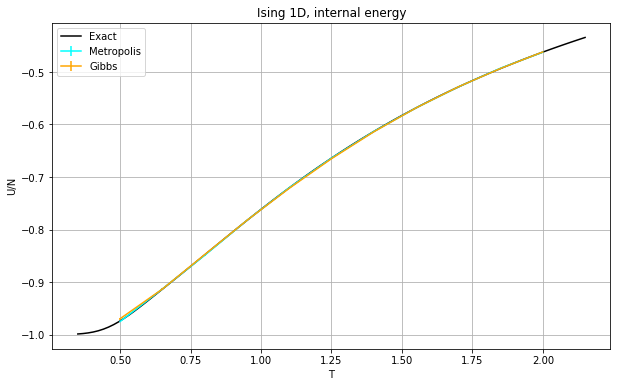

In [59]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#parameters for analitic results
points=100
T = np.linspace(0.35,2.15,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th

plt.figure(figsize=(10,6))
e = -J*( th + ch*thN )/( 1 + thN )
plt.plot(T, e, color="black", label="Exact")
x, f, error = np.loadtxt("EnergyM.txt", usecols=(0,3,4), delimiter=' ', unpack='true')
xG, fG, errorG = np.loadtxt("EnergyG.txt", usecols=(0,3,4), delimiter=' ', unpack='true')
plt.errorbar(x,f,yerr=error, color="cyan", label= "Metropolis")
plt.errorbar(xG,fG,yerr=errorG, color="orange", label= "Gibbs")

plt.title('Ising 1D, internal energy')
plt.xlabel('T')
plt.ylabel('U/N')
plt.grid(True)
plt.legend()
plt.show()

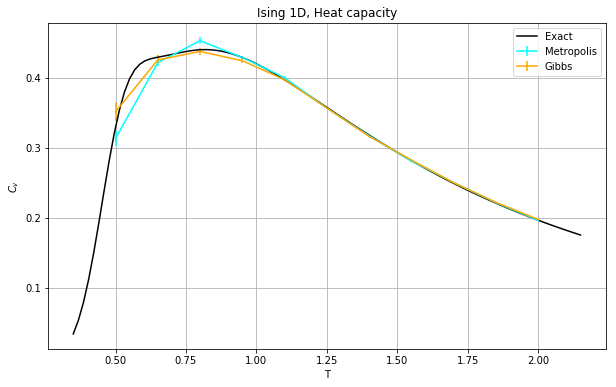

In [62]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,6))
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
plt.plot(T, heat, color="black", label="Exact")
x, f, error = np.loadtxt("HeatM.txt", usecols=(0,3,4), delimiter=' ', unpack='true')
xG, fG, errorG = np.loadtxt("HeatG.txt", usecols=(0,3,4), delimiter=' ', unpack='true')
plt.errorbar(x,f,yerr=error, color="cyan", label= "Metropolis")
plt.errorbar(xG,fG,yerr=errorG, color="orange", label= "Gibbs")

plt.title('Ising 1D, Heat capacity')
plt.xlabel('T')
plt.ylabel('$C_v$')
plt.grid(True)
plt.legend()
plt.show()

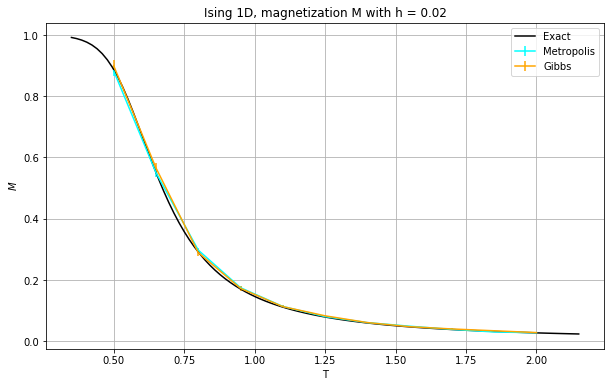

In [64]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

plt.figure(figsize=(10,6))
plt.plot(T, M, color="black", label="Exact")
x, f, error = np.loadtxt("MagM.txt", usecols=(0,3,4), delimiter=' ', unpack='true')
xG, fG, errorG = np.loadtxt("MagG.txt", usecols=(0,3,4), delimiter=' ', unpack='true')
plt.errorbar(x,f,yerr=error, color="cyan", label= "Metropolis")
plt.errorbar(xG,fG,yerr=errorG, color="orange", label= "Gibbs")

plt.title('Ising 1D, magnetization M with h = 0.02')
plt.xlabel('T')
plt.ylabel('$M$')
plt.grid(True)
plt.legend()
plt.show()

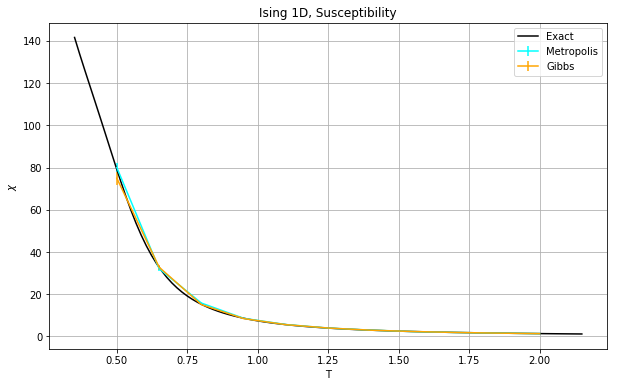

In [65]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,6))
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
plt.plot(T, X, color="black", label="Exact")
x, f, error = np.loadtxt("ChiM.txt", usecols=(0,3,4), delimiter=' ', unpack='true')
xG, fG, errorG = np.loadtxt("ChiG.txt", usecols=(0,3,4), delimiter=' ', unpack='true')
#I had to multiply for T because i mispelled the c++ code for Chi multipling for an unnecessary beta.
plt.errorbar(x,f*x,yerr=error, color="cyan", label= "Metropolis")
plt.errorbar(xG,fG*x,yerr=errorG, color="orange", label= "Gibbs")

plt.title('Ising 1D, Susceptibility')
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.grid(True)
plt.legend()
plt.show()